# 00 - Environment Check
**Ziel:** Prueft, ob die lokale Umgebung fuer die Projektpipeline (`00` bis `05`) bereit ist.
**Pruefumfang:** Python/Package-Versionen, Projektpfade, Eingabedateien, Notebook-Verfuegbarkeit, OSM-Basisabruf.
**Ausfuehrung:** Von oben nach unten ausfuehren (Restart & Run All).


## Basis-Imports und Versionscheck
In diesem Schritt werden die zentralen Bibliotheken importiert und ihre Versionen ausgegeben.


In [ ]:
from pathlib import Path
import sys
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt

# Standardisierte Output-Ordner fuer Env-Check-Artefakte
BASE_DIR = Path("..")
OUTPUT_DIR = BASE_DIR / "outputs"
FIG_DIR = OUTPUT_DIR / "figures" / "00_env_check"
TABLE_DIR = OUTPUT_DIR / "tables" / "00_env_check"
FIG_DIR.mkdir(parents=True, exist_ok=True)
TABLE_DIR.mkdir(parents=True, exist_ok=True)
print(f"Python: {sys.version.split()[0]}")
print(f"geopandas: {gpd.__version__}")
print(f"pandas: {pd.__version__}")
print(f"osmnx: {ox.__version__}")


Python: 3.12.2
geopandas: 1.1.1
pandas: 2.3.3
osmnx: 2.0.7


## Projektpfade und Pflichtdateien
Hier wird geprueft, ob die erwartete Projektstruktur sowie die wichtigsten Eingabedateien vorhanden sind.


In [ ]:
BASE_DIR = Path("..")
RAW_DIR = BASE_DIR / "data" / "raw"
INTERIM_DIR = BASE_DIR / "data" / "interim"
PROCESSED_DIR = BASE_DIR / "data" / "processed"
NOTEBOOKS_DIR = BASE_DIR / "notebooks"
required_paths = [
    RAW_DIR,
    INTERIM_DIR,
    PROCESSED_DIR,
    NOTEBOOKS_DIR,
    RAW_DIR / "muc_stadtbezirke.geojson",
    RAW_DIR / "bev_stadtbezirke.csv",
]
missing = [str(p) for p in required_paths if not p.exists()]
print("Projektbasis:", BASE_DIR.resolve())
print("Fehlende Pfade/Dateien:" if missing else "Alle Pflichtpfade/-dateien vorhanden.")
for item in missing:
    print(" -", item)
assert not missing, f"Fehlende Inputs/Struktur: {missing}"


Projektbasis: /Users/lucas.schmidt/00.Uni/03. Semester/active-city-project
Alle Pflichtpfade/-dateien vorhanden.


## Pipeline-Dateien und Schreibtest
Es wird geprueft, ob alle Notebook-Dateien vorhanden sind und ob in `data/interim/` geschrieben werden kann.


In [ ]:
pipeline_notebooks = [
    "00_env_check.ipynb",
    "01_muc_bezirke_und_bevoelkerung.ipynb",
    "02_osm_parks_muc.ipynb",
    "03_osm_sport_muc.ipynb",
    "04_mobility_muc.ipynb",
    "05_active_index_setup.ipynb",
]
missing_nb = [nb for nb in pipeline_notebooks if not (NOTEBOOKS_DIR / nb).exists()]
print("Fehlende Notebooks:" if missing_nb else "Alle Pipeline-Notebooks vorhanden.")
for nb in missing_nb:
    print(" -", nb)
assert not missing_nb, f"Fehlende Pipeline-Notebooks: {missing_nb}"
# Schreibtest fuer Zwischenabla ge
INTERIM_DIR.mkdir(parents=True, exist_ok=True)
test_file = INTERIM_DIR / ".env_check_write_test"
test_file.write_text("ok", encoding="utf-8")
test_file.unlink(missing_ok=True)
print("Schreibtest in data/interim erfolgreich.")


Alle Pipeline-Notebooks vorhanden.
Schreibtest in data/interim erfolgreich.


## OSM-Basischeck (Muenchen)
Kleiner Online-Basischeck: Stadtgrenze Muenchen abrufen und visualisieren.


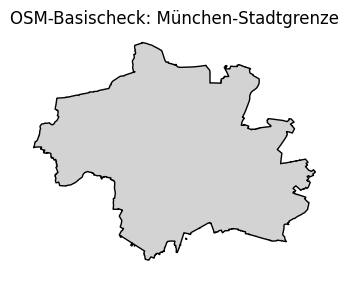

OSM-Basischeck erfolgreich.


In [ ]:
# Nur leichte Probeabfrage, um OSMNX/Nominatim-Zugriff zu validieren.
gdf_city = ox.geocode_to_gdf("München, Deutschland")
ax = gdf_city.plot(figsize=(4, 4), edgecolor="black", facecolor="lightgray")
ax.set_title("OSM-Basischeck: München-Stadtgrenze")
ax.set_axis_off()
plt.savefig(FIG_DIR / "01_osm_basischeck_muenchen.png", dpi=180, bbox_inches="tight")
plt.show()
# Mini-Tabelle fuer den Check exportieren
gdf_city[["display_name"]].head(1).to_csv(
    TABLE_DIR / "01_osm_basischeck_city.csv", index=False
)
print("OSM-Basischeck erfolgreich.")
